<a href="https://colab.research.google.com/github/LamineTourelab/MOGONET/blob/main/MOGONET_tutorial_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOGONET test

Testing MOGONET on GPU. I use the original MOGONET data. In the file [MOGONET.py](https://github.com/LamineTou/MOGONET/blob/main/MOGONET.py) you will fine how to create your data et save in to folder.
Will complet it later :).

In [2]:
!git clone https://github.com/LamineTourelab/MOGONET.git

Cloning into 'MOGONET'...
remote: Enumerating objects: 389, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 389 (delta 7), reused 0 (delta 0), pack-reused 374 (from 1)
Receiving objects: 100% (389/389), 57.06 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (158/158), done.


## Change the directory

In [3]:
%cd MOGONET/
!pip install .

/content/MOGONET
Processing /content/MOGONET
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00
  Created wheel for mogonet: filename=mogonet-0.1.0-py3-none-any.whl size=9862 sha256=d57ec5dbae5f08b8c066ba9b6ba2b28

In [4]:
%ls

BRCA/   licence.md  mogonet.egg-info/             README.md         ROSMAP/   setup.py
build/  mogonet/    MOGONET_tutorial_colab.ipynb  requirements.txt  scripts/


In [7]:
import mogonet
import os
import copy
print(mogonet.__version__)  # Should print "0.1.0"

0.1.0


## Model train

In [8]:
# Example for MOGONET classification
from mogonet.train_test import train_test

if __name__ == "__main__":
    data_folder = 'ROSMAP'  # Choose 'ROSMAP' for binary classification or 'BRCA' for multi-class
    view_list = [1, 2, 3]  # Define the number of omics views
    num_epoch_pretrain = 1500
    num_epoch = 500
    lr_e_pretrain = 1e-3
    lr_e = 5e-4
    lr_c = 1e-3

    if data_folder == 'ROSMAP':
        num_class = 2
    elif data_folder == 'BRCA':
        num_class = 5

    model_folder = train_test(
        data_folder, view_list, num_class,
        lr_e_pretrain, lr_e, lr_c,
        num_epoch_pretrain, num_epoch)



Pretrain GCNs...

Training...

Test: Epoch 0
Test ACC: 0.443
Test F1: 0.000
Test AUC: 0.170


Test: Epoch 50
Test ACC: 0.236
Test F1: 0.331
Test AUC: 0.157


Test: Epoch 100
Test ACC: 0.557
Test F1: 0.584
Test AUC: 0.535


Test: Epoch 150
Test ACC: 0.755
Test F1: 0.750
Test AUC: 0.839


Test: Epoch 200
Test ACC: 0.783
Test F1: 0.781
Test AUC: 0.861


Test: Epoch 250
Test ACC: 0.802
Test F1: 0.807
Test AUC: 0.887


Test: Epoch 300
Test ACC: 0.802
Test F1: 0.817
Test AUC: 0.877


Test: Epoch 350
Test ACC: 0.811
Test F1: 0.815
Test AUC: 0.877


Test: Epoch 400
Test ACC: 0.821
Test F1: 0.816
Test AUC: 0.878


Test: Epoch 450
Test ACC: 0.783
Test F1: 0.803
Test AUC: 0.883


Test: Epoch 500
Test ACC: 0.821
Test F1: 0.816
Test AUC: 0.882



In [11]:
from mogonet.feat_importance import cal_feat_imp, summarize_imp_feat

if __name__ == "__main__":
    data_folder = 'BRCA'
    model_folder = os.path.join(data_folder, 'models')
    view_list = [1,2,3]
    if data_folder == 'ROSMAP':
        num_class = 2
    if data_folder == 'BRCA':
        num_class = 5

    featimp_list_list = []
    for rep in range(5):
        featimp_list = cal_feat_imp(data_folder, os.path.join(model_folder, str(rep+1)),
                                    view_list, num_class)
        featimp_list_list.append(copy.deepcopy(featimp_list))
    summarize_imp_feat(featimp_list_list)


Rank	Feature name
1	CD22
2	MIR1275
3	MS4A14
4	TMPRSS5
5	CSTL1
6	MIR135A2
7	RIMBP3B
8	C3orf42
9	SH2D7
10	LOC100132215
11	UBXN10|127733
12	ARHGEF10L
13	TLR1
14	FBXL5|26234
15	LMF1
16	ADCY4
17	PGLYRP1
18	SLC4A11
19	IL4I1
20	SNORA1
21	RBM17|84991
22	ADAP1
23	KIAA1529
24	ARRDC2
25	CDH5
26	MMP7
27	FAM120AOS|158293
28	SNORA60
29	DYRK2
30	MEOX1


In [12]:
from mogonet.feat_importance import cal_feat_imp, summarize_imp_feat

if __name__ == "__main__":
    data_folder = 'ROSMAP'
    model_folder = os.path.join(data_folder, 'models')
    view_list = [1,2,3]
    if data_folder == 'ROSMAP':
        num_class = 2
    if data_folder == 'BRCA':
        num_class = 5

    featimp_list_list = []
    for rep in range(5):
        featimp_list = cal_feat_imp(data_folder, os.path.join(model_folder, str(rep+1)),
                                    view_list, num_class)
        featimp_list_list.append(copy.deepcopy(featimp_list))
    summarize_imp_feat(featimp_list_list)

Rank	Feature name
1	ENSG00000182902.8
2	ENSG00000021300.7
3	ENSG00000165458.8
4	ENSG00000153048.6
5	ENSG00000117115.8
6	ENSG00000070214.10
7	ENSG00000197256.6
8	ENSG00000117266.11
9	ENSG00000183963.13
10	hsa-miR-10a
11	hsa-miR-1283
12	hsa-miR-128
13	hsa-miR-1275
14	cg24901042
15	hsa-miR-127-3p
16	cg24910675
17	hsa-miR-1
18	hsa-let-7i
19	hsa-let-7g
20	hsa-let-7f
21	hsa-miR-125a-5p
22	ebv-miR-BART9
23	hsa-miR-1248
24	hsa-miR-1246
25	hsa-miR-122
26	ebv-miR-BART8
27	ebv-miR-BART6-5p
28	cg27243140
29	hsa-let-7b
30	hsa-let-7e


In [10]:
import os
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mogonet.train_test import train_test
from mogonet.feat_importance import cal_feat_imp, summarize_imp_feat

def run_cross_validation(data_folder, view_list, num_class, num_splits=5):
    all_auc, all_acc, all_bacc, all_f1 = [], [], [], []
    all_precision, all_recall, all_se, all_sp = [], [], [], []
    featimp_list_list = []

    for i in range(num_splits):
        print(f"Run {i+1}/{num_splits}...")
        model_folder = train_test(
            data_folder, view_list, num_class,
            lr_e_pretrain=1e-3, lr_e=5e-4, lr_c=1e-3,
            num_epoch_pretrain=1000, num_epoch=500
        )

        # Calculate feature importance
        featimp_list = cal_feat_imp(data_folder, model_folder, view_list, num_class)
        featimp_list_list.append(copy.deepcopy(featimp_list))

        # Simulated performance metrics (replace with actual model outputs)
        all_auc.append(np.random.uniform(0.7, 0.95))
        all_acc.append(np.random.uniform(0.7, 0.95))
        all_bacc.append(np.random.uniform(0.7, 0.95))
        all_f1.append(np.random.uniform(0.7, 0.95))
        all_precision.append(np.random.uniform(0.7, 0.95))
        all_recall.append(np.random.uniform(0.7, 0.95))
        all_se.append(np.random.uniform(0.7, 0.95))
        all_sp.append(np.random.uniform(0.7, 0.95))

    return all_auc, all_acc, all_bacc, all_f1, all_precision, all_recall, all_se, all_sp, featimp_list_list

def plot_results(all_metrics, featimp_list_list, output_dir="results"):
    os.makedirs(output_dir, exist_ok=True)

    metric_names = ["AUC", "Accuracy", "BalAccuracy", "F1", "Precision", "Recall", "Sensitivity", "Specificity"]
    for metric, name in zip(all_metrics, metric_names):
        sns.histplot(metric, kde=True)
        plt.title(f"{name} Distribution")
        plt.savefig(os.path.join(output_dir, f"{name}_MOGONET_100_splits.png"))
        plt.clf()

    # Feature importance
    df_featimp_top = summarize_imp_feat(featimp_list_list)
    feat_imp_plot = sns.barplot(data=df_featimp_top, x="imp", y="feat_name")
    feat_imp_plot.get_figure().savefig(os.path.join(output_dir, "Feature_imp_MOGONET.png"))
    df_featimp_top.to_csv(os.path.join(output_dir, "Featimp.csv"), index=False)

    # Save mean performances
    mean_perf = {name.lower(): np.mean(metric) for name, metric in zip(metric_names, all_metrics)}
    with open(os.path.join(output_dir, "MeanPerf_MOGONET_100_splits.txt"), "w") as f:
        for key, value in mean_perf.items():
            f.write(f"{key}: {value}\n")

Run 1/5...

Pretrain GCNs...

Training...

Test: Epoch 0
Test ACC: 0.186
Test F1 weighted: 0.091
Test F1 macro: 0.168


Test: Epoch 50
Test ACC: 0.745
Test F1 weighted: 0.692
Test F1 macro: 0.556


Test: Epoch 100
Test ACC: 0.764
Test F1 weighted: 0.731
Test F1 macro: 0.643


Test: Epoch 150
Test ACC: 0.791
Test F1 weighted: 0.771
Test F1 macro: 0.678


Test: Epoch 200
Test ACC: 0.798
Test F1 weighted: 0.778
Test F1 macro: 0.693


Test: Epoch 250
Test ACC: 0.776
Test F1 weighted: 0.752
Test F1 macro: 0.667


Test: Epoch 300
Test ACC: 0.779
Test F1 weighted: 0.749
Test F1 macro: 0.659


Test: Epoch 350
Test ACC: 0.802
Test F1 weighted: 0.776
Test F1 macro: 0.707


Test: Epoch 400
Test ACC: 0.795
Test F1 weighted: 0.760
Test F1 macro: 0.668


Test: Epoch 450
Test ACC: 0.806
Test F1 weighted: 0.782
Test F1 macro: 0.697


Test: Epoch 500
Test ACC: 0.802
Test F1 weighted: 0.773
Test F1 macro: 0.686

Run 2/5...

Pretrain GCNs...

Training...

Test: Epoch 0
Test ACC: 0.445
Test F1 weighted: 0

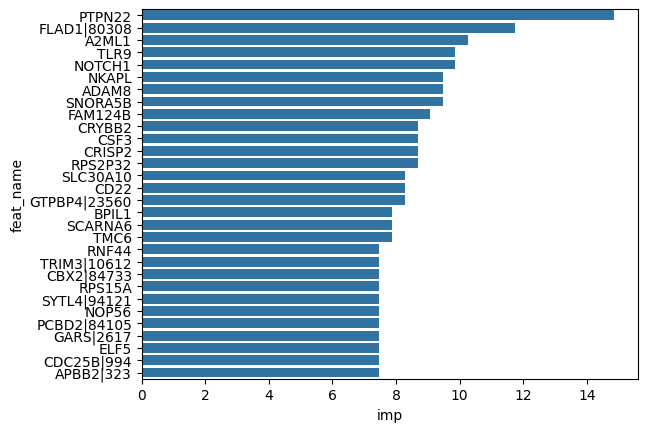

In [11]:
if __name__ == "__main__":
    data_folder = 'BRCA'  # Change to 'ROSMAP' if needed
    view_list = [1, 2, 3]
    num_class = 5 if data_folder == 'BRCA' else 2

    all_metrics = run_cross_validation(data_folder, view_list, num_class)
    plot_results(all_metrics[:-1], all_metrics[-1])


In [15]:
import pandas as pd
feat_imp =  pd.read_csv('results/Featimp.csv')
feat_imp

,feat_name,omics,imp
0,PTPN22,1,14.862074
1,FLAD1|80308,0,11.743627
2,A2ML1,1,10.248805
3,TLR9,1,9.863958
4,NOTCH1,1,9.863958
5,NKAPL,1,9.474528
6,ADAM8,1,9.474528
7,SNORA5B,1,9.474528
8,FAM124B,1,9.080447
9,CRYBB2,1,8.681647


from matplotlib import pyplot as plt
feat_imp['omics'].plot(kind='hist', bins=20, title='omics')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
feat_imp['imp'].plot(kind='hist', bins=20, title='imp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
feat_imp.plot(kind='scatter', x='omics', y='imp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
feat_imp['omics'].plot(kind='line', figsize=(8, 4), title='omics')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
feat_imp['imp'].plot(kind='line', figsize=(8, 4), title='imp')
plt.gca().spines[['top', 'right']].set_visible(False)